In [24]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb
import keras
%matplotlib inline

In [107]:
# location of the dataset
filename = 'http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data'

# column names for the data
colnames = ['age',
            'sex',
            'cp',
            'trestbps',
            'chol',
            'fbs',
            'restecg',
            'thalach',
            'exang',
            'oldpeak',
            'slope',
            'ca',
            'thal',
            'num']

# read data to data frame
df = pd.read_csv(filename, 
                 names = colnames, 
                 na_values = '?')

# Show first 5 rows
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,32,1,1,95.0,0,NaN,0.0,127.0,0.0,0.7,1.0,NaN,NaN,1
1,34,1,4,115.0,0,NaN,NaN,154.0,0.0,0.2,1.0,NaN,NaN,1
2,35,1,4,NaN,0,NaN,0.0,130.0,1.0,NaN,NaN,NaN,7.0,3
3,36,1,4,110.0,0,NaN,0.0,125.0,1.0,1.0,2.0,NaN,6.0,1
4,38,0,4,105.0,0,NaN,0.0,166.0,0.0,2.8,1.0,NaN,NaN,2


In [110]:
df_stats = df.describe()
df_stats

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,123.000000,123.000000,123.000000,121.000000,123.0,48.000000,122.000000,122.000000,122.000000,117.000000,106.000000,5.000000,71.000000,123.000000
mean,55.317073,0.918699,3.699187,130.206612,0.0,0.104167,0.360656,121.557377,0.442623,0.653846,1.801887,1.600000,5.788732,1.804878
std,9.032108,0.274414,0.688726,22.559151,0.0,0.308709,0.590077,25.977438,0.498745,1.056061,0.623658,0.547723,1.731354,1.013503
min,32.000000,0.000000,1.000000,80.000000,0.0,0.000000,0.000000,60.000000,0.000000,-2.600000,1.000000,1.000000,3.000000,0.000000
25%,51.000000,1.000000,4.000000,115.000000,0.0,0.000000,0.000000,104.250000,0.000000,0.000000,1.000000,1.000000,3.000000,1.000000
50%,56.000000,1.000000,4.000000,125.000000,0.0,0.000000,0.000000,121.000000,0.000000,0.300000,2.000000,2.000000,7.000000,2.000000
75%,61.500000,1.000000,4.000000,145.000000,0.0,0.000000,1.000000,140.000000,1.000000,1.500000,2.000000,2.000000,7.000000,3.000000
max,74.000000,1.000000,4.000000,200.000000,0.0,1.000000,2.000000,182.000000,1.000000,3.700000,3.000000,2.000000,7.000000,4.000000


In [111]:
df = (df - df.min())/(df.max()-df.min())
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,123.000000,123.000000,123.000000,121.000000,0.0,48.000000,122.000000,122.000000,122.000000,117.000000,106.000000,5.000000,71.000000,123.000000
mean,0.555168,0.918699,0.899729,0.418388,NaN,0.104167,0.180328,0.504569,0.442623,0.516484,0.400943,0.600000,0.697183,0.451220
std,0.215050,0.274414,0.229575,0.187993,NaN,0.308709,0.295039,0.212930,0.498745,0.167629,0.311829,0.547723,0.432838,0.253376
min,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452381,1.000000,1.000000,0.291667,NaN,0.000000,0.000000,0.362705,0.000000,0.412698,0.000000,0.000000,0.000000,0.250000
50%,0.571429,1.000000,1.000000,0.375000,NaN,0.000000,0.000000,0.500000,0.000000,0.460317,0.500000,1.000000,1.000000,0.500000
75%,0.702381,1.000000,1.000000,0.541667,NaN,0.000000,0.500000,0.655738,1.000000,0.650794,0.500000,1.000000,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [112]:
df['chol'] = 0
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,123.000000,123.000000,123.000000,121.000000,123.0,48.000000,122.000000,122.000000,122.000000,117.000000,106.000000,5.000000,71.000000,123.000000
mean,0.555168,0.918699,0.899729,0.418388,0.0,0.104167,0.180328,0.504569,0.442623,0.516484,0.400943,0.600000,0.697183,0.451220
std,0.215050,0.274414,0.229575,0.187993,0.0,0.308709,0.295039,0.212930,0.498745,0.167629,0.311829,0.547723,0.432838,0.253376
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452381,1.000000,1.000000,0.291667,0.0,0.000000,0.000000,0.362705,0.000000,0.412698,0.000000,0.000000,0.000000,0.250000
50%,0.571429,1.000000,1.000000,0.375000,0.0,0.000000,0.000000,0.500000,0.000000,0.460317,0.500000,1.000000,1.000000,0.500000
75%,0.702381,1.000000,1.000000,0.541667,0.0,0.000000,0.500000,0.655738,1.000000,0.650794,0.500000,1.000000,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


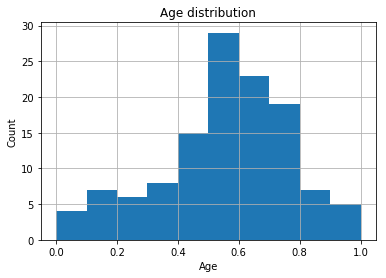

In [113]:
df['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age distribution');

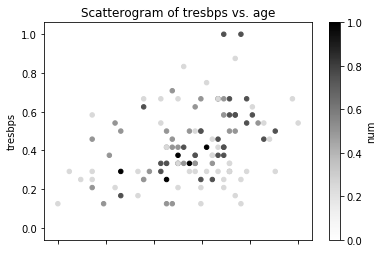

In [114]:
df.plot.scatter('age', 'trestbps', c = 'num')
plt.xlabel('Age')
plt.ylabel('tresbps')
plt.title('Scatterogram of tresbps vs. age')
plt.show()

In [115]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
age,1.000000,-0.049042,-0.033295,0.368880,NaN,0.140315,0.269359,-0.286407,-0.022257,0.151160,0.090648,0.586195,0.091553,0.050689
sex,-0.049042,1.000000,0.043017,-0.084082,NaN,0.088045,0.081689,-0.121767,0.085800,-0.045398,-0.023671,NaN,0.375035,0.089853
cp,-0.033295,0.043017,1.000000,-0.017238,NaN,0.143247,-0.236240,-0.056341,0.272819,0.178777,0.064606,-0.560112,0.430994,0.232277
trestbps,0.368880,-0.084082,-0.017238,1.000000,NaN,0.080003,0.189016,-0.207370,0.129051,0.084557,-0.140378,0.436051,-0.169939,0.137289
chol,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
fbs,0.140315,0.088045,0.143247,0.080003,NaN,1.000000,-0.009368,0.183231,-0.154037,0.220189,0.078235,NaN,0.060644,0.210928
restecg,0.269359,0.081689,-0.236240,0.189016,NaN,-0.009368,1.000000,0.015577,-0.118635,-0.089420,-0.083021,0.218218,0.062691,0.045467
thalach,-0.286407,-0.121767,-0.056341,-0.207370,NaN,0.183231,0.015577,1.000000,-0.222045,0.170555,-0.155537,-0.557869,0.085427,-0.295579
exang,-0.022257,0.085800,0.272819,0.129051,NaN,-0.154037,-0.118635,-0.222045,1.000000,0.172993,0.193089,-1.000000,0.231957,0.132090
oldpeak,0.151160,-0.045398,0.178777,0.084557,NaN,0.220189,-0.089420,0.170555,0.172993,1.000000,-0.044153,-0.515969,0.269453,0.186790


C:\Users\tommiluk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


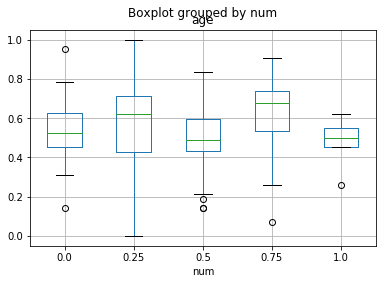

In [116]:
df.boxplot(column='age', by='num');

C:\Users\tommiluk\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


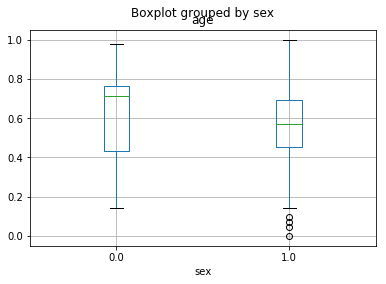

In [117]:
df.boxplot(column='age', by='sex');

In [38]:
# see: https://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots

C:\Users\tommiluk\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2918: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  'left=%s, right=%s') % (left, right))
C:\Users\tommiluk\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3239: UserWarning: Attempting to set identical bottom==top results
in singular transformations; automatically expanding.
bottom=0.0, top=0.0
  'bottom=%s, top=%s') % (bottom, top))


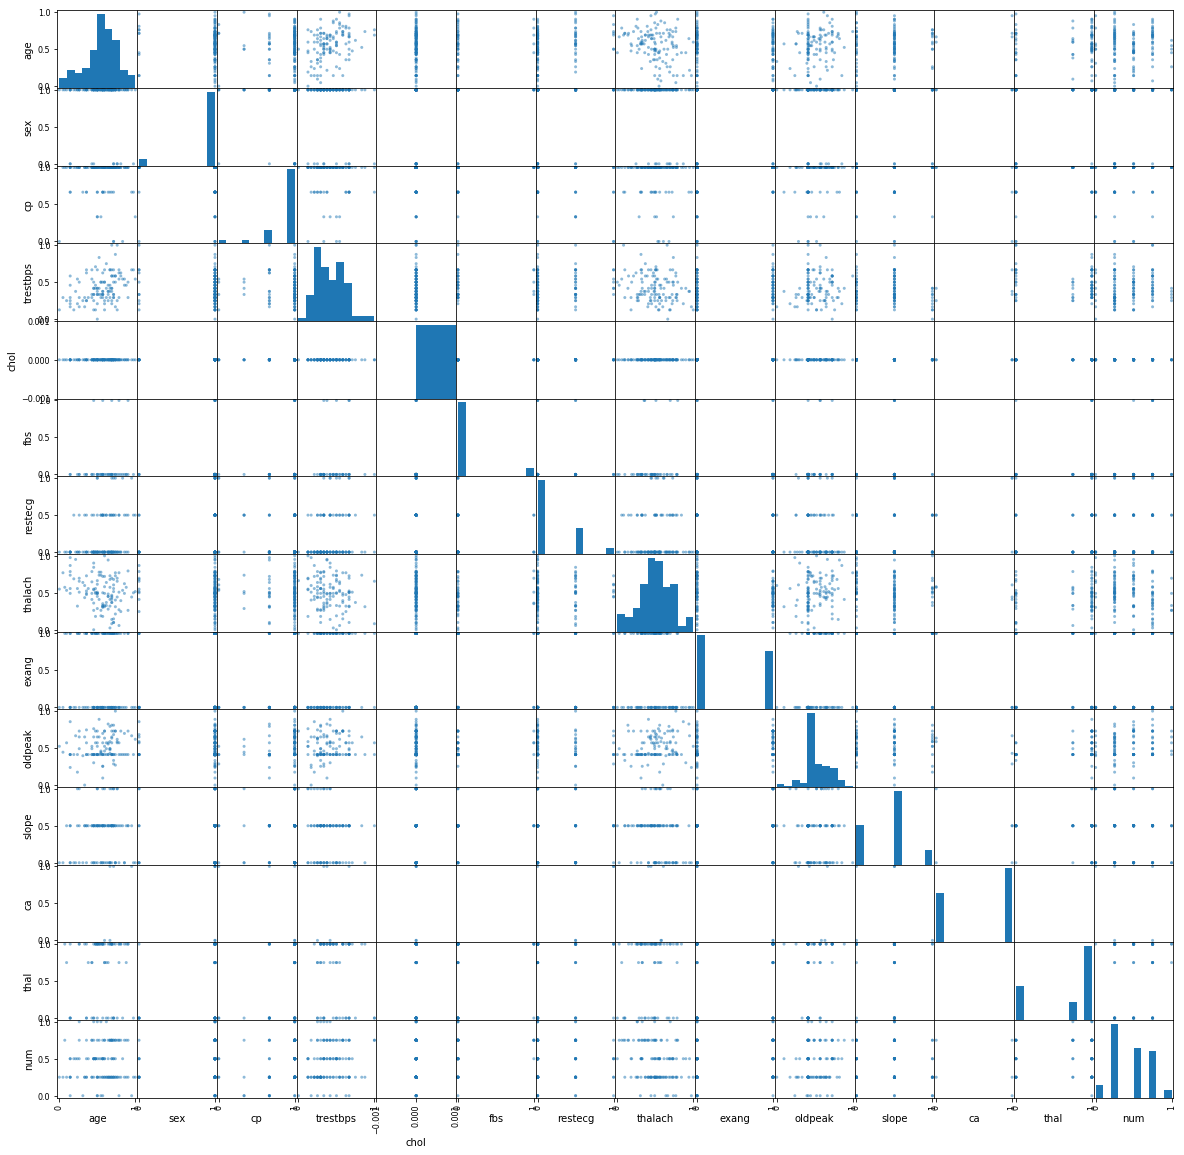

In [118]:
# see: https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot
from pandas.plotting import scatter_matrix
scatter_matrix(df, figsize = (20, 20));

In [119]:
df.values

array([[ 0.        ,  1.        ,  0.        , ...,         nan,
                nan,  0.25      ],
       [ 0.04761905,  1.        ,  1.        , ...,         nan,
                nan,  0.25      ],
       [ 0.07142857,  1.        ,  1.        , ...,         nan,
         1.        ,  0.75      ],
       ..., 
       [ 0.95238095,  1.        ,  0.66666667, ...,  1.        ,
                nan,  0.        ],
       [ 0.97619048,  0.        ,  0.66666667, ...,         nan,
         0.        ,  0.25      ],
       [ 1.        ,  1.        ,  0.33333333, ...,         nan,
                nan,  0.25      ]])

In [122]:
labels = df['num'].values > 0
data = df.values 
data = data[:, :-1]

In [123]:
labels

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True], dtype=bool)

In [124]:
data

array([[ 0.        ,  1.        ,  0.        , ...,  0.        ,
                nan,         nan],
       [ 0.04761905,  1.        ,  1.        , ...,  0.        ,
                nan,         nan],
       [ 0.07142857,  1.        ,  1.        , ...,         nan,
                nan,  1.        ],
       ..., 
       [ 0.95238095,  1.        ,  0.66666667, ...,  0.5       ,
         1.        ,         nan],
       [ 0.97619048,  0.        ,  0.66666667, ...,  0.        ,
                nan,  0.        ],
       [ 1.        ,  1.        ,  0.33333333, ...,  0.        ,
                nan,         nan]])

In [67]:
np.mean(data, axis = 0)

array([ 55.31707317,   0.91869919,   3.69918699,          nan,
         0.        ,          nan,          nan,          nan,
                nan,          nan,          nan,          nan,          nan])

In [68]:
np.nanmean(data, axis = 0)

array([  5.53170732e+01,   9.18699187e-01,   3.69918699e+00,
         1.30206612e+02,   0.00000000e+00,   1.04166667e-01,
         3.60655738e-01,   1.21557377e+02,   4.42622951e-01,
         6.53846154e-01,   1.80188679e+00,   1.60000000e+00,
         5.78873239e+00])

In [69]:
np.nanmedian(data, axis = 0)

array([  56. ,    1. ,    4. ,  125. ,    0. ,    0. ,    0. ,  121. ,
          0. ,    0.3,    2. ,    2. ,    7. ])

In [70]:
np.isnan(data)

array([[False, False, False, ..., False,  True,  True],
       [False, False, False, ..., False,  True,  True],
       [False, False, False, ...,  True,  True, False],
       ..., 
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ..., False,  True,  True]], dtype=bool)

In [87]:
i = np.isnan(df['thal'])
m = df.mode()
df.fillna(m)
m

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,61,1,4,115.0,0,0.0,0.0,120.0,0.0,0.0,2.0,2.0,7.0,1


In [127]:
df.where(~np.isnan(df), df.mode(), axis = 'columns').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.000000,1.0,0.0,0.125000,0,0.0,0.0,0.549180,0.0,0.523810,0.0,1.0,1.00,0.25
1,0.047619,1.0,1.0,0.291667,0,0.0,0.0,0.770492,0.0,0.444444,0.0,1.0,1.00,0.25
2,0.071429,1.0,1.0,0.291667,0,0.0,0.0,0.573770,1.0,0.412698,0.5,1.0,1.00,0.75
3,0.095238,1.0,1.0,0.250000,0,0.0,0.0,0.532787,1.0,0.571429,0.5,1.0,0.75,0.25
4,0.142857,0.0,1.0,0.208333,0,0.0,0.0,0.868852,0.0,0.857143,0.0,1.0,1.00,0.50


In [125]:
df = df.where(~np.isnan(df), df.mode(), axis = 'columns')

In [126]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,123.000000,123.000000,123.000000,123.000000,123.0,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000,123.000000
mean,0.555168,0.918699,0.899729,0.416328,0.0,0.040650,0.178862,0.504465,0.439024,0.511421,0.414634,0.983740,0.825203,0.451220
std,0.215050,0.274414,0.229575,0.187139,0.0,0.198287,0.294277,0.212058,0.498298,0.164989,0.291318,0.126992,0.360633,0.253376
min,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.452381,1.000000,1.000000,0.291667,0.0,0.000000,0.000000,0.364754,0.000000,0.412698,0.000000,1.000000,1.000000,0.250000
50%,0.571429,1.000000,1.000000,0.375000,0.0,0.000000,0.000000,0.500000,0.000000,0.444444,0.500000,1.000000,1.000000,0.500000
75%,0.702381,1.000000,1.000000,0.541667,0.0,0.000000,0.500000,0.655738,1.000000,0.642857,0.500000,1.000000,1.000000,0.750000
max,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [100]:
df = (df - df.min())/(df.max()-df.min())

In [101]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,-2.581576,0.296270,-3.919101,-1.556747,NaN,-0.205008,-0.607802,0.210864,-0.881048,0.075088,-1.423305,0.128041,0.484694,-0.794154
1,-2.360144,0.296270,0.436767,-0.666143,NaN,-0.205008,-0.607802,1.254498,-0.881048,-0.405945,-1.423305,0.128041,0.484694,-0.794154
2,-2.249428,0.296270,0.436767,-0.666143,NaN,-0.205008,-0.607802,0.326823,1.125784,-0.598358,0.293033,0.128041,0.484694,1.179199
3,-2.138712,0.296270,0.436767,-0.888794,NaN,-0.205008,-0.607802,0.133558,1.125784,0.363708,0.293033,0.128041,-0.208531,-0.794154
4,-1.917279,-3.347855,0.436767,-1.111445,NaN,-0.205008,-0.607802,1.718335,-0.881048,2.095425,-1.423305,0.128041,0.484694,0.192522
5,-1.917279,-3.347855,0.436767,-0.888794,NaN,-0.205008,-0.607802,1.331804,-0.881048,-0.598358,0.293033,0.128041,-2.288207,-0.794154
6,-1.917279,0.296270,-1.015189,-1.334096,NaN,-0.205008,-0.607802,2.220826,-0.881048,-1.656629,-1.423305,0.128041,0.484694,-1.780831
7,-1.917279,0.296270,-1.015189,-0.666143,NaN,-0.205008,-0.607802,0.249517,1.125784,-0.598358,0.293033,0.128041,0.484694,-0.794154
8,-1.917279,0.296270,0.436767,0.224461,NaN,-0.205008,-0.607802,1.099885,-0.881048,-0.598358,0.293033,0.128041,-2.288207,0.192522
9,-1.917279,0.296270,0.436767,0.892415,NaN,-0.205008,-0.607802,-0.059708,1.125784,-0.598358,0.293033,0.128041,-2.288207,-0.794154
